In [ ]:
#!pip install yfinance

     |████████████████████████████████| 6.3MB 7.9MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=2cf3d6419d4520aa5e14d150a13797abf61cd1aba2f49f445ffa09c191c75be8
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import pandas as pd
import numpy as np
#import yfinance as yf
from fbprophet import Prophet
import plotly.graph_objects as go
#from pandas_datareader import data

In [ ]:
dados = pd.read_csv("/content/CSNA3.SA.csv")

dados.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-09,10.90,10.90,9.95,10.02,8.204591,10263000.0
1,2016-05-10,10.22,10.60,10.07,10.47,8.573060,10057100.0
2,2016-05-11,10.75,10.83,9.95,9.95,8.147273,10397800.0
3,2016-05-12,10.05,10.32,9.63,9.63,7.885251,10452700.0
4,2016-05-13,9.61,9.70,8.39,8.40,6.878100,11606600.0


In [ ]:
dados.shape

(1245, 7)

In [ ]:
x = dados.iloc[:,0:2]
x.head()

,Date,Open
0,2016-05-09,10.90
1,2016-05-10,10.22
2,2016-05-11,10.75
3,2016-05-12,10.05
4,2016-05-13,9.61


In [ ]:
x = x.rename(columns={'Date':'ds', 'Open':'y'})
x

,ds,y
0,2016-05-09,10.900000
1,2016-05-10,10.220000
2,2016-05-11,10.750000
3,2016-05-12,10.050000
4,2016-05-13,9.610000
...,...,...
1240,2021-05-03,49.000000
1241,2021-05-04,47.520000
1242,2021-05-05,48.740002
1243,2021-05-06,51.189999


In [ ]:
modelo = Prophet()
#modelo.fit(x)

In [ ]:
modelo

In [ ]:
modelo.fit(x)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = modelo.make_future_dataframe(periods=365)
future.tail()

,ds
1605,2022-05-03
1606,2022-05-04
1607,2022-05-05
1608,2022-05-06
1609,2022-05-07


In [ ]:
forecast = modelo.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1605,2022-05-03,80.905951,68.174653,94.277923
1606,2022-05-04,80.907497,68.520873,94.412154
1607,2022-05-05,80.880142,67.897161,95.057862
1608,2022-05-06,80.904292,68.278845,94.870961
1609,2022-05-07,82.532755,69.991944,96.700900


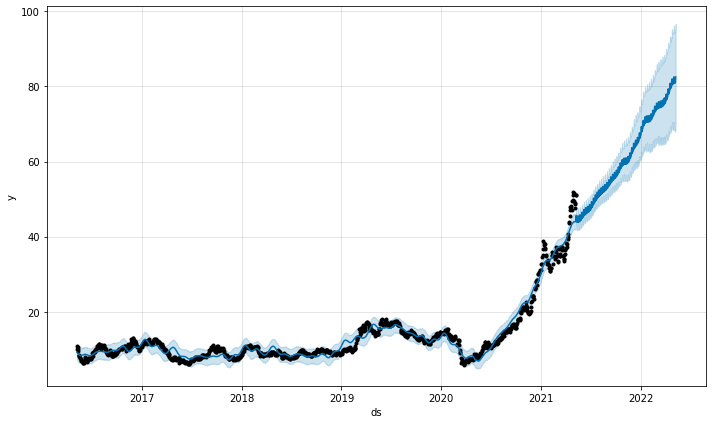

In [ ]:
fig1 = modelo.plot(forecast)

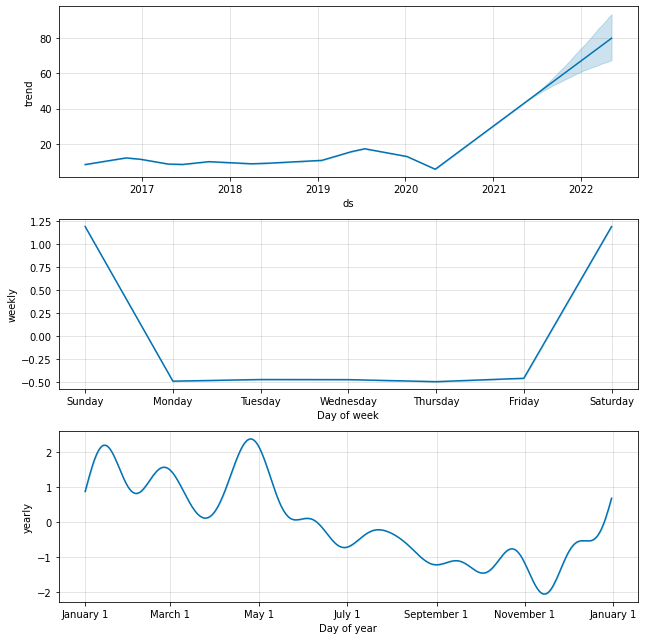

In [ ]:
fig2 = modelo.plot_components(forecast)

In [ ]:
layout = go.Layout(title="Previsões de preços da Ação CSN3.SA", xaxis= {'title':'Data'},
                   yaxis=dict(title='Preço em R$'), hovermode='closest')

fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(x=future['ds'], y=x['y'],
                    mode='lines',
                    name='Valores reais'))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'],
                    mode='lines',
                    name='Previsões'))

fig.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
previsoes = forecast['yhat']

In [ ]:
previsoes = previsoes.iloc[0:1245]

In [ ]:
#print(mean_squared_error(x['y'], previsoes))